# Lab 01: Data pre-processing

- Student ID: 21127627
- Student name: Cao Nguyễn Khánh

## Instructions

### How to do your homework

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```YOUR ANSWER HERE``` in text cells.

**NOTE:**

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule. 
- Because our plagiarism checker is very sensitive, if the plagiarism check result is <font color='red'>greater than 60%</font>, your work will receive <font color='red'>0 point</font>. Therefore we will not deal with plagiarism cases.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1.ipynb` (e.g. `19123.ipynb`) and submit on Moodle.

<font color=yellow>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points (0-50%)!!!</font>


### Contents

- Data pre-processing techniques.
    - Exploring your data (2 pts)
    - Encoding categorical (2 pts)
    - Discretization techniques (2 pts)
    - Outlier handling techniques (1 pts)
    - Feature scaling techniques (2 pts)
    - Clean submission (1 pts)

## Import libs
**Note:** <span style="color:yellow">All packages you can use in this lab are imported in the cell below. Please don't modify this, just run that.</span>

In [123]:
import warnings
warnings.filterwarnings('ignore')

In [124]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler

In [125]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [126]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [127]:
# Checking Python virtual env
sys.executable

'c:\\Users\\Admin\\miniconda3\\envs\\min_ds-env\\python.exe'

## Exploring your data (2 pts)

### Read rawdata from file

In [128]:
# YOUR CODE HERE
# raise NotImplementedError()

# Đọc file CSV
raw_df = pd.read_csv('./data/spaceX_laucnh.csv')

In [129]:
# TEST
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [130]:
# YOUR CODE HERE
# raise NotImplementedError()
shape = raw_df.shape

In [131]:
# TEST
assert adler32(str(np.sqrt(shape[0] * shape[1])).encode()) == 590480314

### What does each line mean? Does it matter if the lines have different meanings?

**TODO**: 

YOUR ANSWER HERE
- Each line provides information about the launches and landings of SpaceX rockets from 2006 to 2022.
- The difference in the meaning of each line can affect how the dataset is used. If the lines have different meanings, understanding and handling them will also vary depending on the specific use case of the user.

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [132]:
# YOUR CODE HERE
# raise NotImplementedError()
num_duplicated_rows = raw_df.duplicated().sum()


In [133]:
# TEST
assert adler32(str(num_duplicated_rows).encode()) == 3211313

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file "metadata.json" in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [134]:
# YOUR CODE HERE
# raise NotImplementedError()
# Đọc file metadata.json vào DataFrame
with open('./data/metadata.json', 'r') as f:
    loadfile = json.load(f)

metadata = pd.DataFrame(loadfile['attributions'].items(), columns=['Column', 'Description'])

In [135]:
# TEST
metadata

,Column,Description
0,uct_time,Launch date in UTC format.
1,launch_name,Launch name. Typically the name of the space mission.
2,payloads,The list information about the payloads on the launch.
3,rocket_name,The name of the rocket.
4,rocket_boosters,The number of boosters on the rocket.
5,rocket_height,The height information about the rocket (m).
6,rocket_diameter,The diameter information about the rocket (m).
7,rocket_mass,The mass information about the rocket (kg).
8,launchpad_name,The name of the launchpad.
9,launchpad_region,The region of the launchpad.


**TODO: Describe datatype**

YOUR ANSWER HERE
- uct_time: This column represents launch dates in UTC format. It should be stored as datetime64 data type.
- launch_name: This column contains the names of space missions. It can be stored as a string data type.
- payloads: This column contains information about payloads, including their types, masses, and orbits. Since it's in JSON format and contains - nested structures, it can be stored as a string data type or parsed into a structured format like a list or dictionary.
- rocket_name: This column represents the names of rockets. It can be stored as a string data type.
- rocket_boosters: This column indicates the number of boosters on the rocket. It should be stored as an integer data type.
- rocket_height, rocket_diameter, rocket_mass: These columns contain numeric information about the rocket's height, diameter, and mass. They should be stored as float data types.
- launchpad_name, launchpad_region, launchpad_geo: These columns contain information about the launchpad, including its name, region, and geographical location. They can be stored as string data types.
- landpad, landpad_name, landpad_type, landpad_region, landpad_geo: These columns contain information about the landing pad, including its name, type, region, and geographical location. They can be stored as string data types.
- outcome: This column represents the success or failure of the launch, indicated by boolean values. It should be stored as a boolean data type.

Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [136]:
# YOUR CODE HERE
# raise NotImplementedError()
dtypes = raw_df.dtypes
dtypes

uct_time             object
launch_name          object
payloads             object
rocket_name          object
rocket_boosters       int64
rocket_height       float64
rocket_diameter     float64
rocket_mass         float64
launchpad_name       object
launchpad_region     object
launchpad_geo        object
landpad             float64
landpad_name         object
landpad_type         object
landpad_region       object
landpad_geo          object
outcome              object
dtype: object

In [137]:
# TEST
# dtypes = raw_df.dtypes

int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 3276850

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols)).encode()) == 3473461

object_cols = set(dtypes[dtypes == object].index)
assert adler32(str(len(object_cols)).encode()) == 9830500

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [138]:
# YOUR CODE HERE
# raise NotImplementedError()

# Chuyển cột 'uct_time' sang kiểu datetime
raw_df['uct_time'] = pd.to_datetime(raw_df['uct_time'])

In [139]:
# TEST
raw_df["uct_time"].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [140]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


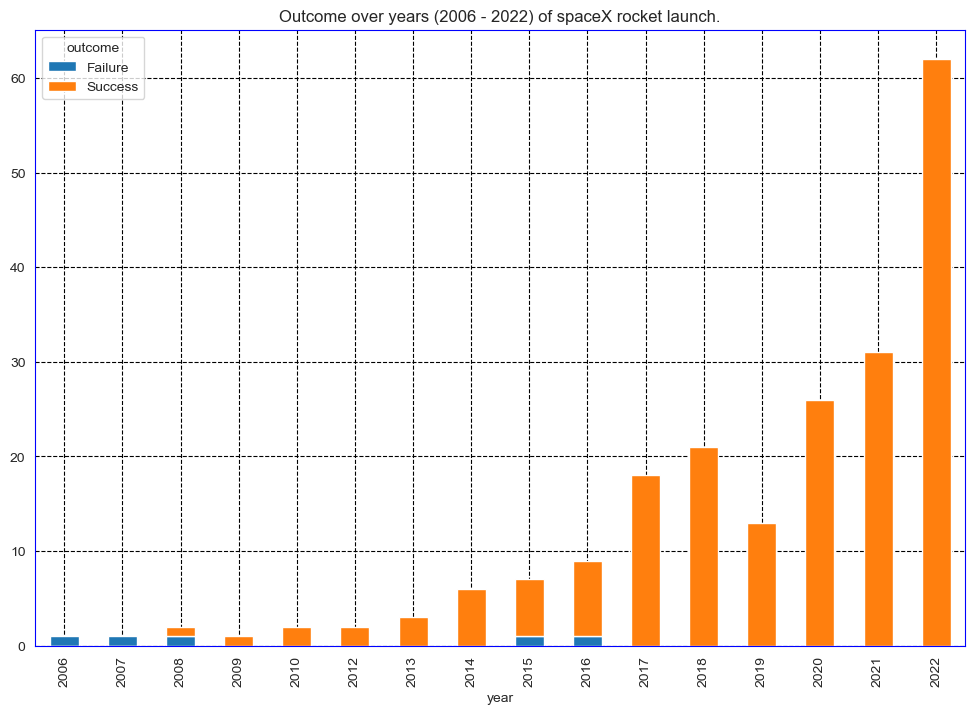

In [141]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Outcome over years (2006 - 2022) of spaceX rocket launch.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE
- The chart above illustrates the outcome over the years (2006 - 2022) of SpaceX rocket launches.
- In the early years, there were very few rocket launches, with the number increasing over time. However, in 2019, for some reason, the number of rocket launches decreased.
- In the early years, the failure rate was very high, but it has gradually decreased over time.

### Exploring numerical attributes

In [142]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [143]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    # raise NotImplementedError()
    return (s.isnull().mean() * 100).round(1)

def median(df):
    # TODO:
    # YOUR CODE HERE
    # raise NotImplementedError()
    return df.quantile(0.5).round(1)

def lower_quartile(df):
    # TODO:
    # YOUR CODE HERE
    # raise NotImplementedError()
    return df.quantile(0.25).round(1)

def upper_quartile(df):
    # TODO:
    # YOUR CODE HERE
    # raise NotImplementedError()
    return df.quantile(0.75).round(1)

In [144]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,29.80,29.80,29.8,100.0
min,0.0,22.25,1.68,30146.0,NaN
lower_quartile,0.0,70.00,3.70,549054.0,NaN
median,0.0,70.00,3.70,549054.0,NaN
upper_quartile,0.0,70.00,3.70,549054.0,NaN
max,2.0,70.00,12.20,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [145]:
# YOUR CODE HERE
# raise NotImplementedError()

missing_ratios = num_col_info_df.loc['missing_ratio']

# Lấy ra các cột có tỉ lệ thiếu lớn hơn 70%
columns_to_drop = missing_ratios[missing_ratios > 70].index

# Loại bỏ các cột từ DataFrame
missing_ratios = missing_ratios.drop(index=columns_to_drop)
raw_df = raw_df.drop(columns=columns_to_drop)


num_col_df = num_col_df.drop(columns=columns_to_drop)

In [146]:
# TEST
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN
3,0,22.25,1.68,NaN
4,0,22.25,1.68,30146.0


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [147]:
# YOUR CODE HERE
## Mean fill
# raise NotImplementedError()

# Lấy danh sách các cột có tỉ lệ thiếu
columns_with_missing_values  = missing_ratios[missing_ratios > 0].index
columns_with_missing_values 

# Thay thế giá trị thiếu và tạo cột mới
num_col_df = num_col_df.assign(**{f'mean_fill_{col}': num_col_df[col].fillna(num_col_df[col].mean()) for col in columns_with_missing_values})

num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,mean_fill_rocket_height,mean_fill_rocket_diameter,mean_fill_rocket_mass
0,0,22.25,1.68,30146.0,22.25,1.68,30146.000000
1,0,22.25,1.68,30146.0,22.25,1.68,30146.000000
2,0,22.25,1.68,NaN,22.25,1.68,556404.541667
3,0,22.25,1.68,NaN,22.25,1.68,556404.541667
4,0,22.25,1.68,30146.0,22.25,1.68,30146.000000


In [148]:
# YOUR CODE HERE
## Median fill
# raise NotImplementedError()
# Thay thế giá trị thiếu và tạo cột mới
num_col_df = num_col_df.assign(**{f'median_fill_{col}': num_col_df[col].fillna(num_col_df[col].median()) for col in columns_with_missing_values})
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,mean_fill_rocket_height,mean_fill_rocket_diameter,mean_fill_rocket_mass,median_fill_rocket_height,median_fill_rocket_diameter,median_fill_rocket_mass
0,0,22.25,1.68,30146.0,22.25,1.68,30146.000000,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0,22.25,1.68,30146.000000,22.25,1.68,30146.0
2,0,22.25,1.68,NaN,22.25,1.68,556404.541667,22.25,1.68,549054.0
3,0,22.25,1.68,NaN,22.25,1.68,556404.541667,22.25,1.68,549054.0
4,0,22.25,1.68,30146.0,22.25,1.68,30146.000000,22.25,1.68,30146.0


In [149]:
# YOUR CODE HERE
## Mode fill
# raise NotImplementedError()
# Thay thế giá trị thiếu và tạo cột mới
num_col_df = num_col_df.assign(**{f'mode_fill_{col}': num_col_df[col].fillna(num_col_df[col].mode()[0]) for col in columns_with_missing_values})
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,mean_fill_rocket_height,mean_fill_rocket_diameter,mean_fill_rocket_mass,median_fill_rocket_height,median_fill_rocket_diameter,median_fill_rocket_mass,mode_fill_rocket_height,mode_fill_rocket_diameter,mode_fill_rocket_mass
0,0,22.25,1.68,30146.0,22.25,1.68,30146.000000,22.25,1.68,30146.0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0,22.25,1.68,30146.000000,22.25,1.68,30146.0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN,22.25,1.68,556404.541667,22.25,1.68,549054.0,22.25,1.68,549054.0
3,0,22.25,1.68,NaN,22.25,1.68,556404.541667,22.25,1.68,549054.0,22.25,1.68,549054.0
4,0,22.25,1.68,30146.0,22.25,1.68,30146.000000,22.25,1.68,30146.0,22.25,1.68,30146.0


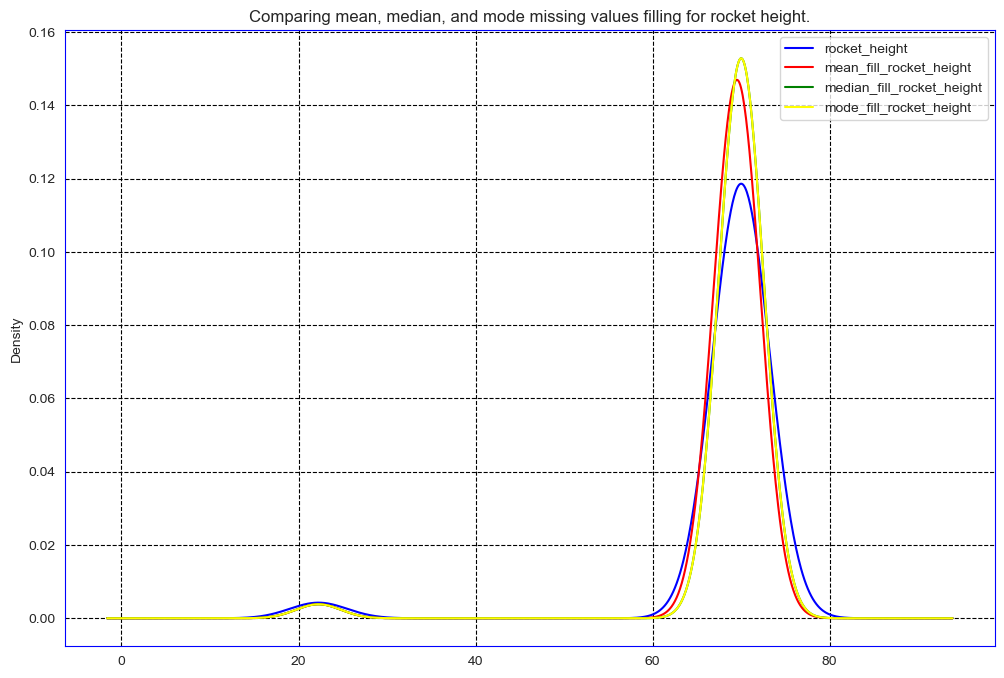

In [150]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_height"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_height"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket height.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE
- The distributions of the missing value fill methods are quite similar, all centered around a central value.
- Filling missing values with the median seems to be the most suitable method for the original distribution of the data as it generates a distribution curve closest to the original distribution.
- Filling missing values with the mean also produces a distribution fairly close to the original distribution, but with some smaller peaks at different locations.
- Filling missing values with the mode is almost similar to filling missing values with the median.

**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

In [151]:
# YOUR CODE HERE
## Recheck: find unique elements in `rocket_name`
raw_df["rocket_name"].unique()

# Find unique elements in the "rocket_name" column
unique_rocket_names = raw_df["rocket_name"].unique()

# Initialize an empty dictionary to store the results
rocket_height_range_dict = {}

## Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    """Checking range of height for a given rocket name

    Args:
        rocket_name (str): the name of rocket

    Returns:
        tuple[float, float]: the range, min-max.
    """
    # raise NotImplementedError()
    rocket_data = raw_df[raw_df["rocket_name"] == rocket_name]
    min_height = rocket_data["rocket_height"].min()
    max_height = rocket_data["rocket_height"].max()
    return min_height, max_height

for rocket_name in unique_rocket_names:
    min_height, max_height = checking_range(rocket_name)
    # Save results to the dictionary
    rocket_height_range_dict[rocket_name] = {"min_height": min_height, "max_height": max_height}
rocket_height_range_dict

{'Falcon 1': {'min_height': 22.25, 'max_height': 22.25},
 'Falcon 9': {'min_height': 70.0, 'max_height': 70.0},
 'Falcon Heavy': {'min_height': 70.0, 'max_height': 70.0}}

In [152]:
# Perform checking for Falcon 1
assert adler32(str(checking_range(rocket_name="Falcon 1")[0] + checking_range(rocket_name="Falcon 1")[1]).encode()) == 33620172

In [153]:
# Perform checking for Falcon 9
assert adler32(str(checking_range(rocket_name="Falcon 9")[0] + checking_range(rocket_name="Falcon 9")[1]).encode()) == 48627956

In [154]:
# Perform checking for Falcon Heavy
assert adler32(str(checking_range(rocket_name="Falcon Heavy")[0] * checking_range(rocket_name="Falcon Heavy")[1]).encode()) == 70713644

And now, you should fill missing values with a specific value. 

In [155]:
# TODO:
# YOUR CODE HERE
def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    
    # Tính giá trị trung bình của cột B theo giá trị cột A
    mean_values = cp_df.groupby('rocket_name')['rocket_height'].mean()

    # Điền giá trị bị thiếu ở cột B dựa trên giá trị trung bình của cột B tương ứng với giá trị cột A
    cp_df['rocket_height'] = cp_df.apply(lambda row: mean_values[row['rocket_name']] if pd.isna(row['rocket_height']) else row['rocket_height'], axis=1)
    
    
    # raise NotImplementedError()
    return cp_df

raw_df = fill_rocketheight(raw_df)


Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [156]:
# YOUR CODE HERE
# raise NotImplementedError()

columns_to_fill = ['rocket_diameter', 'rocket_mass']

# Fill missing values with mean for selected columns
raw_df[columns_to_fill] = raw_df[columns_to_fill].fillna(raw_df[columns_to_fill].mean())



In [157]:
# TEST
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


In [158]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
assert num_col_info_df.shape == (6, 4)

data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['rocket_boosters', 'rocket_height', 'rocket_diameter', 'rocket_mass']].values

assert adler32(str(data).encode()) == 1580417893

**TODO** What type of each numerical attribute? Continous?  variable?

YOUR ANSWER HERE
- rocket_boosters: Discrete variable 
- rocket_height: Continuous variable 
- rocket_diameter: Continuous variable 
- rocket_mass: Continuous variable 

### Exploring non-numerical attributes

In [159]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [160]:
def str2dict(s: str) -> List[Dict]:
    """Convert given string to dict
    
    Example:
        - Input string: [{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]
        - Output: ({'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'})


    Args:
        s (str): _description_
        
    Return:
        list(dict):
    """
    # TODO:
    # YOUR CODE HERE
    # raise NotImplementedError()
    try:
        # Chuyển đổi chuỗi thành danh sách các từ điển
        dict_list = eval(s)
        # Kiểm tra xem dict_list có phải là danh sách không
        if isinstance(dict_list, list):
            return dict_list
        else:
            # Nếu không phải danh sách, trả về danh sách rỗng
            return []
    except json.JSONDecodeError:
        # Xử lý ngoại lệ khi chuỗi không hợp lệ
        print("Invalid input string. Please provide a valid string representing a list of dictionaries.")
        return []

input_string = "[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]"
output_list_of_dicts = str2dict(input_string)
output_list_of_dicts

[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'},
 {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]

Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [161]:
# TODO:
# YOUR CODE HERE
# raise NotImplementedError()
def add_brackets(cell):
    if pd.isna(cell):
        return '[]'
    else:
        return f"[{cell}]"
    
# Convert 'payloads' column to string and then apply str2dict
cate_col_df['payloads'] = cate_col_df['payloads'].apply(str2dict)
cate_col_df = cate_col_df.explode('payloads')
cate_col_df['payloads'] = cate_col_df['payloads'].apply(add_brackets)

raw_df['payloads'] = raw_df['payloads'].apply(str2dict)
raw_df = raw_df.explode('payloads')
raw_df['payloads'] = raw_df['payloads'].apply(add_brackets)


For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [162]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    # raise NotImplementedError()
    return (s.isnull().mean() * 100).round(1)
   
def num_values(s):
    # TODO:
    # YOUR CODE HERE
    # raise NotImplementedError()
    return s.nunique()

def value_ratios(s):
    # TODO:
    # YOUR CODE HERE
    # raise NotImplementedError()
    value_counts = s.value_counts()
    ratios = (value_counts / value_counts.sum() * 100).round(1)
    return ratios.to_dict()


cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,147,3,4,3,4,6,3,2,5,2
value_ratios,"{'Trailblazer': 1.0, 'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.0, 'COTS 1': 1.0, 'CRS-...","{'[{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}]': 11.5, '[{'type': 'Satellite', 'mass'...","{'Falcon 9': 94.7, 'Falcon 1': 2.9, 'Falcon Heavy': 2.4}","{'CCSFS SLC 40': 55.0, 'KSC LC 39A': 27.8, 'VAFB SLC 4E': 14.4, 'Kwajalein Atoll': 2.9}","{'Florida': 82.8, 'California': 14.4, 'Marshall Islands': 2.9}","{'(28.5618571, -80.577366)': 55.0, '(28.6080585, -80.6039558)': 27.8, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 40.7, '(nan, nan)': 27.3, '(28.4104, -80.6188)': 20.6, '(28.485833...","{'Success': 97.1, 'Failure': 2.9}"


In [163]:
# TEST
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33554635
assert adler32(str(c.loc['num_values']).encode()) == 3604535

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33161421
assert adler32(str(c.loc['num_values']).encode()) == 3407924

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 34144462
assert adler32(str(c.loc['num_values']).encode()) == 3342387

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Considering the missing ratio, should we delete these attribute columns?


YOUR ANSWER HERE
- We should not delete these columns.Because:
    - The largest missing ratio is 47.4 < 70.
    - It is possible to use the available data to fill in the missing cells.

Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `cate_col_df`.

In [164]:
# TODO:
# YOUR CODE HERE
# raise NotImplementedError()
# Columns to check
columns_to_check = ['landpad_name', 'landpad_type', 'landpad_region']

# Check if NaN appears in 2 or more specified columns and drop those rows
cate_col_df = cate_col_df.dropna(subset=columns_to_check, thresh=len(columns_to_check)-1)
cate_col_df.reset_index(drop=True, inplace=True)

raw_df = raw_df.dropna(subset=columns_to_check, thresh=len(columns_to_check)-1)
raw_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
cate_col_df.head()



,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,CRS-5,"[{'type': 'Dragon 1.1', 'mass': 2395, 'orbit': 'ISS'}]",Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success
1,CRS-6,"[{'type': 'Dragon 1.1', 'mass': 1898, 'orbit': 'ISS'}]",Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success
2,CRS-7,"[{'type': 'Dragon 1.1', 'mass': 1952, 'orbit': 'ISS'}]",Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure
3,OG-2 Mission 2,"[{'type': 'Satellite', 'mass': 2034, 'orbit': 'LEO'}]",Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success
4,Jason 3,"[{'type': 'Satellite', 'mass': 553, 'orbit': 'PO'}]",Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success


In [165]:
# TEST
cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [166]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.6,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'[{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}]': 15.8, '[{'type': 'Satellite', 'mass'...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

TODO: Complete the table below.

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  | California  |
| JRTI  | ASDS  | Florida  |
| ASOG  | ASDS  |  Port Canaveral, Florida  |
| LZ-1  | RTLS | Florida |
| LZ-4  | RTLS  | California  |
| JRTI-1  | ASDS  | Florida  |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

TODO: What are the further rules you can find?

YOUR ANSWER HERE
- rockets which have landpad type is `Ocean` that are missing values ​​for both the landpad_name and landpad_region attributes.
- Falcon 1 always are missing values ​for both the landpad type, landpad_name and landpad_region attributes. 
- In a row, if only one attribute is missing among landpad_name, landpad_type, and landpad_region, then the attribute assigned will be landpad_region.

**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`

TODO: What are the further rules you can find?

YOUR ANSWER HERE

- rockets which have landpad name is `LZ-1`, and landpad type is `RTLS` => landpad region `Florida`
- rockets which have landpad name is `LZ-4`, and landpad type is `RTLS` => landpad region `California`
- rockets which have landpad name is `JRTI-1`, and landpad type is `ASDS` => landpad region `Florida`
- if rockets which have landpad name is `OCISLY` => landpad type is `ASDS`


In [167]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe.

    Args:
        df (pd.DataFrame): input dataframe

    Returns:
        pd.DataFrame: output dataframe
    """
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()

    # Observation 1: Fill missing values for specific conditions
    condition_1 = (df_cp['rocket_name'] == 'Falcon 9') & (df_cp['landpad_name'] == 'OCISLY') & (df_cp['landpad_type'] == 'ASDS') & (df_cp['landpad_region'].isnull())
    df_cp.loc[condition_1, 'landpad_region'] = 'California'

    condition_2 = (df_cp['rocket_name'] == 'Falcon 9') & (df_cp['landpad_name'] == 'JRTI') & (df_cp['landpad_type'] == 'ASDS') & (df_cp['landpad_region'].isnull())
    df_cp.loc[condition_2, 'landpad_region'] = 'Florida'

    condition_3 = (df_cp['rocket_name'] == 'Falcon 9') & (df_cp['landpad_name'] == 'ASOG') & (df_cp['landpad_type'] == 'ASDS') & (df_cp['landpad_region'].isnull())
    df_cp.loc[condition_3, 'landpad_region'] = 'Florida'

    condition_4 = (df_cp['landpad_name'] == 'LZ-1') & (df_cp['landpad_type'] == 'RTLS') & (df_cp['landpad_region'].isnull())
    df_cp.loc[condition_4, 'landpad_region'] = 'Florida'

    condition_5 = (df_cp['landpad_name'] == 'LZ-4') & (df_cp['landpad_type'] == 'RTLS') & (df_cp['landpad_region'].isnull())
    df_cp.loc[condition_5, 'landpad_region'] = 'California'

    condition_6 = (df_cp['rocket_name'] == 'Falcon Heavy') & (df_cp['landpad_name'] == 'OCISLY') & (df_cp['landpad_type'] == 'ASDS') & (df_cp['landpad_region'].isnull())
    df_cp.loc[condition_6, 'landpad_region'] = 'California'



    return df_cp

# Apply the function to your DataFrame
cate_col_df = fill_landpadregion(cate_col_df)



In [168]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'[{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}]': 15.8, '[{'type': 'Satellite', 'mass'...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


In [169]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3604535
assert adler32(str(c.loc['value_ratios']['LZ-1']).encode()) == 32440521

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode())  == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['RTLS']).encode()) == 33226957

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['California']).encode()) ==  33751242

TODO: Fill missing values for all `raw_df`

In [170]:
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)

# YOUR CODE HERE
# raise NotImplementedError()

# Set the "launch_name" column as the index for both DataFrames
raw_df.set_index("launch_name", inplace=True)
cate_col_df.set_index("launch_name", inplace=True)

# Update values in raw_df with values from cate_col_df
raw_df.update(cate_col_df)

# Reset the index to its original state
cate_col_df.reset_index(inplace=True)
raw_df.reset_index(inplace=True)


In [171]:
# TEST 01
assert raw_df.shape == (152, 16)

In [172]:
# TEST 02
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'[{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}]': 15.8, '[{'type': 'Satellite', 'mass'...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


Consider the `payloads` attributes; you have to check whether they have missing values.

In [173]:
cate_col_df["payloads"] = cate_col_df["payloads"].apply(str2dict)
# Chuyển cột payloads thành các cột mới dựa trên khóa trong từ điển
cate_col_df2 = pd.concat([cate_col_df.drop(['payloads'], axis=1), cate_col_df['payloads'].apply(lambda x: pd.Series(x[0]) if x else pd.Series([None, None, None]))], axis=1)

# cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)  
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,180.0,VLEO
148,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,Satellite,14760.0,VLEO
149,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,16100.0,VLEO
150,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,13260.0,VLEO


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [174]:
# YOUR CODE HERE
# raise NotImplementedError()

# Columns to check
columns_to_check = ['type', 'mass', 'orbit']

# Check if NaN appears in 2 or more specified columns and drop those rows
cate_col_df2 = cate_col_df2.dropna(subset=columns_to_check, thresh=len(columns_to_check)-1)
cate_col_df2.head()

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


In [175]:
cate_col_df2.shape

(151, 13)

- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [176]:
# YOUR CODE HERE
# raise NotImplementedError()
drop_idx = cate_col_df2[cate_col_df2["mass"].isnull()].index

In [177]:
cate_col_df2[cate_col_df2["mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [178]:
cate_col_df2.drop(drop_idx, inplace=True)

In [179]:
# TEST
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df2['type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df2['mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df2['orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [180]:
cate_col_df2.shape

(142, 13)

- Step 03: Apply for `raw_df`

In [181]:
# Step 01: unpack `payloads`
# YOUR CODE HERE
# raise NotImplementedError()

raw_df["payloads"] = raw_df["payloads"].apply(str2dict)

raw_df = pd.concat([raw_df.drop(["payloads"], axis=1), raw_df["payloads"].apply(lambda x: pd.Series(x[0]) if x else pd.Series([None, None, None]))], axis=1)

# Columns to check
columns_to_check = ['type', 'mass', 'orbit']
# Check if NaN appears in 2 or more specified columns and drop those rows
raw_df = raw_df.dropna(subset=columns_to_check, thresh=len(columns_to_check)-1)


In [182]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
# YOUR CODE HERE
# raise NotImplementedError()
cate_col_df2 = cate_col_df2.rename(columns={'type': 'payloads_type', 'mass': 'payloads_mass', 'orbit': 'payloads_orbit'})

raw_df = raw_df.rename(columns={'type': 'payloads_type', 'mass': 'payloads_mass', 'orbit': 'payloads_orbit'})
raw_df.head()

,launch_name,uct_time,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
0,CRS-5,2015-01-10 09:47:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,CRS-6,2015-04-14 20:10:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,CRS-7,2015-06-28 14:21:00+00:00,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,OG-2 Mission 2,2015-12-22 01:29:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,Jason 3,2016-01-17 15:42:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


In [183]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
# YOUR CODE HERE
# raise NotImplementedError()
raw_df = raw_df.dropna(thresh=2)

cate_col_df2 = cate_col_df2.dropna(thresh=2)


In [184]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
# YOUR CODE HERE
# raise NotImplementedError()

#drop None
drop_idx = raw_df[raw_df["payloads_mass"].isnull()].index
raw_df.drop(drop_idx, inplace=True)
raw_df.reset_index(drop=True, inplace=True)

In [185]:
# TEST
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['payloads_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df['payloads_mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df['payloads_orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [186]:
# TEST
raw_df.head()

,launch_name,uct_time,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
0,CRS-5,2015-01-10 09:47:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,CRS-6,2015-04-14 20:10:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,CRS-7,2015-06-28 14:21:00+00:00,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,OG-2 Mission 2,2015-12-22 01:29:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,Jason 3,2016-01-17 15:42:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [187]:
def str2tuple(s: str) -> tuple:
    # YOUR CODE HERE
    # raise NotImplementedError()
    return tuple(map(float, s.strip('()').split(', ')))

In [188]:
# Apply str2tuple
raw_df["launchpad_geo"] = raw_df["launchpad_geo"].apply(str2tuple)
raw_df["landpad_geo"] = raw_df["landpad_geo"].apply(str2tuple)

In [189]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [190]:
raw_df = raw_df.drop(["launchpad_geo", "landpad_geo"], axis=1)
raw_df.head()

,launch_name,uct_time,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
0,CRS-5,2015-01-10 09:47:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,2395.0,ISS,28.561857,-80.577366,28.410400,-80.618800
1,CRS-6,2015-04-14 20:10:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,1898.0,ISS,28.561857,-80.577366,28.410400,-80.618800
2,CRS-7,2015-06-28 14:21:00+00:00,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Dragon 1.1,1952.0,ISS,28.561857,-80.577366,33.729186,-118.262015
3,OG-2 Mission 2,2015-12-22 01:29:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,2034.0,LEO,28.561857,-80.577366,28.485833,-80.544444
4,Jason 3,2016-01-17 15:42:00+00:00,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,553.0,PO,34.632093,-120.610829,28.410400,-80.618800


## Encoding categorical (2 pts)

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `ordinal` attributes, you should use `one hot encoding`, and for `nominal` attributes, you should use `label encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
- Attribute `launch_name` is nominal

In [191]:
# YOUR CODE HERE
# raise NotImplementedError()

col_name = 'launch_name'

df_dummies = raw_df[col_name].str.get_dummies()
df_dummies = df_dummies.add_prefix(col_name + '_')
raw_df = pd.concat([raw_df.drop(columns = col_name), df_dummies], axis=1)



Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
- Attribute `rocket_name` is nominal

In [192]:
# YOUR CODE HERE
# raise NotImplementedError()
col_name = 'rocket_name'

df_dummies = raw_df[col_name].str.get_dummies()
df_dummies = df_dummies.add_prefix(col_name + '_')
raw_df = pd.concat([raw_df.drop(columns = col_name), df_dummies], axis=1)

Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
- Attribute `launchpad_name` is nominal

In [193]:
# YOUR CODE HERE
# raise NotImplementedError()
col_name = 'launchpad_name'

df_dummies = raw_df[col_name].str.get_dummies()
df_dummies = df_dummies.add_prefix(col_name + '_')
raw_df = pd.concat([raw_df.drop(columns = col_name), df_dummies], axis=1)

Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
- Attribute `launchpad_region` is nominal

In [194]:
# YOUR CODE HERE
# raise NotImplementedError()

col_name = 'launchpad_region'

df_dummies = raw_df[col_name].str.get_dummies()
df_dummies = df_dummies.add_prefix(col_name + '_')
raw_df = pd.concat([raw_df.drop(columns = col_name), df_dummies], axis=1)

Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
- Attribute `landpad_name` is nominal

In [195]:
# YOUR CODE HERE
# raise NotImplementedError()

col_name = 'landpad_name'

df_dummies = raw_df[col_name].str.get_dummies()
df_dummies = df_dummies.add_prefix(col_name + '_')
raw_df = pd.concat([raw_df.drop(columns = col_name), df_dummies], axis=1)

Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
- Attribute `landpad_type` is nominal

In [196]:
# YOUR CODE HERE
# raise NotImplementedError()

col_name = 'landpad_type'

df_dummies = raw_df[col_name].str.get_dummies()
df_dummies = df_dummies.add_prefix(col_name + '_')
raw_df = pd.concat([raw_df.drop(columns = col_name), df_dummies], axis=1)

Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
- Attribute `landpad_region` is nominal


In [197]:
# YOUR CODE HERE
# raise NotImplementedError()

col_name = 'landpad_region'

df_dummies = raw_df[col_name].str.get_dummies()
df_dummies = df_dummies.add_prefix(col_name + '_')
raw_df = pd.concat([raw_df.drop(columns = col_name), df_dummies], axis=1)

Step 08: `outcome` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
- Attribute `outcome` is nominal


In [198]:
# YOUR CODE HERE
# raise NotImplementedError()

col_name = 'outcome'

df_dummies = raw_df[col_name].str.get_dummies()
df_dummies = df_dummies.add_prefix(col_name + '_')
raw_df = pd.concat([raw_df.drop(columns = col_name), df_dummies], axis=1)

Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
- Attribute `payloads_type` is nominal


In [199]:
# YOUR CODE HERE
# raise NotImplementedError()

col_name = 'payloads_type'

df_dummies = raw_df[col_name].str.get_dummies()
df_dummies = df_dummies.add_prefix(col_name + '_')
raw_df = pd.concat([raw_df.drop(columns = col_name), df_dummies], axis=1)

Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE
- Attribute `payloads_orbit` is nominal


In [200]:
# YOUR CODE HERE
# raise NotImplementedError()

col_name = 'payloads_orbit'

df_dummies = raw_df[col_name].str.get_dummies()
df_dummies = df_dummies.add_prefix(col_name + '_')
raw_df = pd.concat([raw_df.drop(columns = col_name), df_dummies], axis=1)

After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [201]:
# YOUR CODE HERE
# raise NotImplementedError()

column_types = raw_df.dtypes
column_types

uct_time               datetime64[ns, UTC]
rocket_boosters                      int64
rocket_height                      float64
rocket_diameter                    float64
rocket_mass                        float64
                              ...         
payloads_orbit_MEO                   int64
payloads_orbit_PO                    int64
payloads_orbit_SSO                   int64
payloads_orbit_TLI                   int64
payloads_orbit_VLEO                  int64
Length: 185, dtype: object

In [202]:
# TEST
# Temporally disabled
# dtypes = raw_df.dtypes
# int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
# assert adler32(str(len(int_cols)).encode()) == 9764963

# float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
# assert adler32(str(len(float_cols )).encode()) == 3735609

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [203]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_na

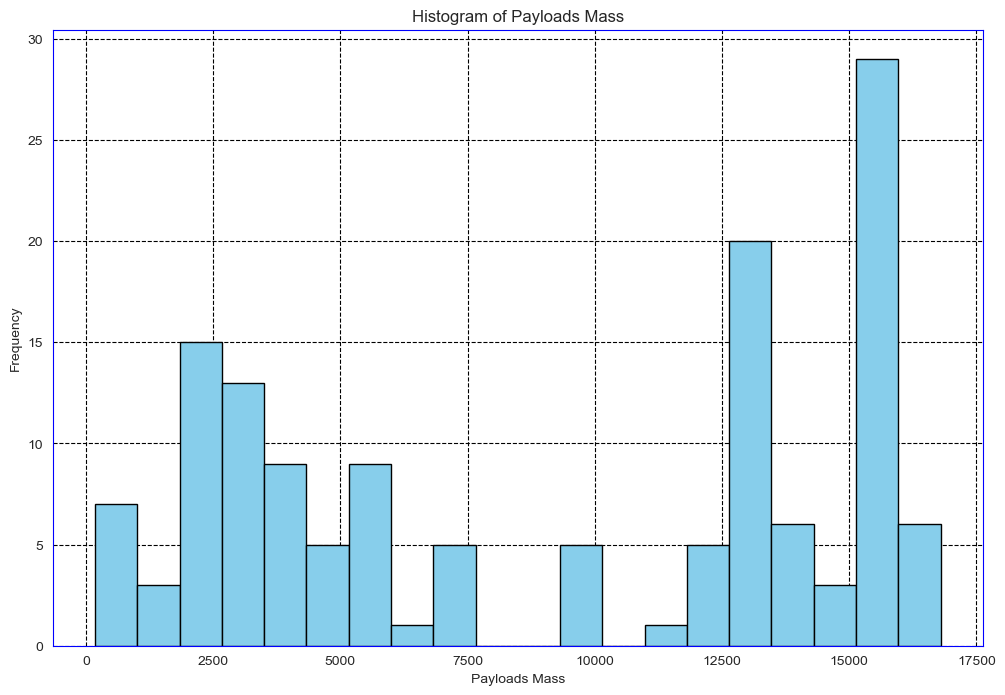

In [204]:
# Vẽ histogram cho cột payloads_mass
plt.hist(raw_df['payloads_mass'], bins=20, color='skyblue', edgecolor='black')

# Đặt tiêu đề và nhãn cho trục x và y
plt.title('Histogram of Payloads Mass')
plt.xlabel('Payloads Mass')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()

### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

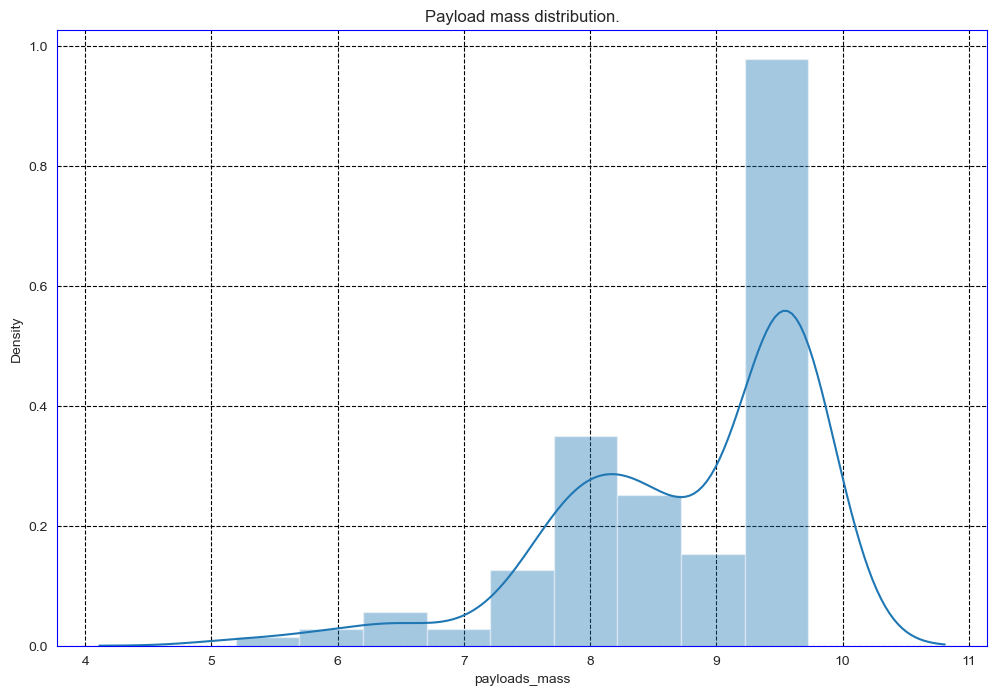

In [205]:
sns.distplot(np.log(raw_df['payloads_mass']))
plt.title("Payload mass distribution.")
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [206]:
# YOUR CODE HERE
# raise NotImplementedError()
# mass_range = ?

# Tính phạm vi tổng khối lượng của payloads
mass_range = raw_df['payloads_mass'].max() - raw_df['payloads_mass'].min()
mass_range

16615.0

In [207]:
# TEST
assert adler32(str(mass_range).encode()) == 94306658

- Step 02: Calculate the upper and upper bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [208]:
# YOUR CODE HERE
# raise NotImplementedError()
# lower_interval =?
# upper_interval =?

# Tính giá trị dưới cho payloads
lower_interval = np.floor(raw_df["payloads_mass"].min()).astype(int)

# Tính giá trị trên cho payloads
upper_interval = np.ceil(raw_df["payloads_mass"].max()).astype(int)

# Hiển thị kết quả
print("Lower interval for payloads:", lower_interval)
print("Upper interval for payloads:", upper_interval)

Lower interval for payloads: 180
Upper interval for payloads: 16795


In [209]:
# TEST
assert adler32(str(lower_interval).encode()) == 20316314
assert adler32(str(upper_interval).encode()) == 52297997

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [210]:
# YOUR CODE HERE
# raise NotImplementedError()
# interval_size =?
# total_bins =?
# # Tìm giá trị lớn nhất và nhỏ nhất trong cột 'payloads_mass'
# payloads_mass_max = raw_df['payloads_mass'].max()
# payloads_mass_min = raw_df['payloads_mass'].min()
# n = len(raw_df['payloads_mass'])
# # Lấy giá trị 25% (Q1) và 75% (Q3)
# Q1 = np.percentile(raw_df['payloads_mass'], 25)
# Q3 = np.percentile(raw_df['payloads_mass'], 75)


# # Tính khoảng IQR
# IQR = Q3 - Q1

# # Tính số lượng bins
# total_bins = int(((payloads_mass_max - payloads_mass_min) / (2 * IQR * n**(-1/3))).round(0))

# # Tính kích thước của khoảng
# interval_size = (payloads_mass_max - payloads_mass_min) / total_bins

# print("Kích thước của khoảng:", interval_size)
# print("Tổng số bins:", total_bins)

total_bins = 4
interval_size = mass_range / total_bins
total_bins, interval_size


(4, 4153.75)

And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [211]:
# YOUR CODE HERE
# raise NotImplementedError()
bin_labels = [f"bin_no_{i+1}" for i in range(int(total_bins))]
print("Nhãn của các bin:", bin_labels)

Nhãn của các bin: ['bin_no_1', 'bin_no_2', 'bin_no_3', 'bin_no_4']


And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [212]:
# YOUR CODE HERE
# raise NotImplementedError()

raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=total_bins, labels=bin_labels)
raw_df

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_na

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

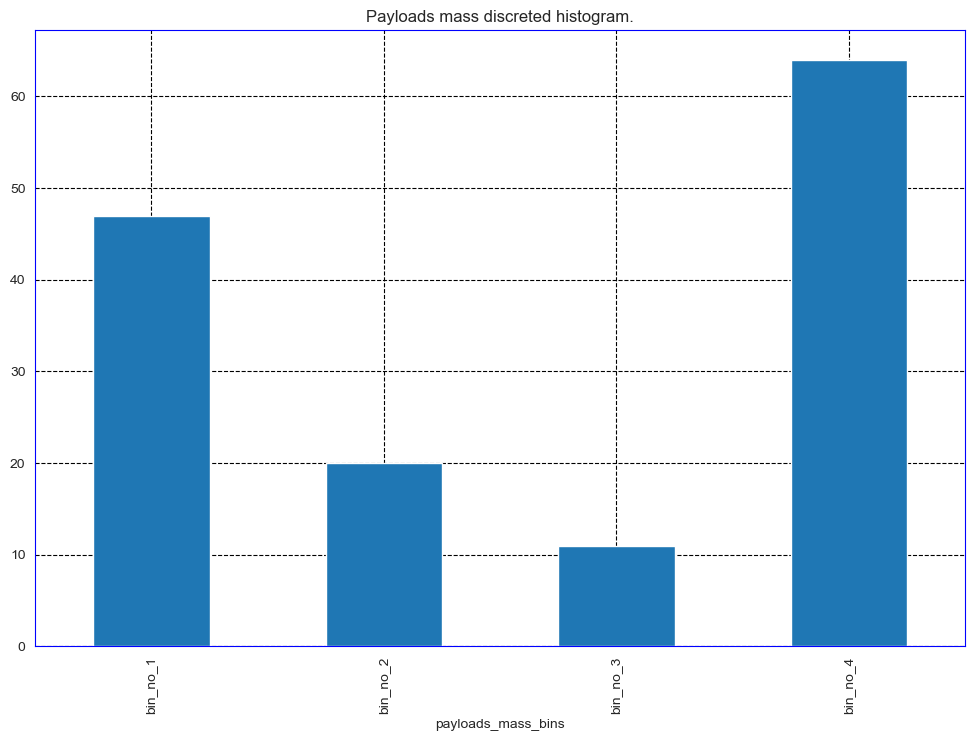

In [213]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE
- The chart illustrates the distribution of values. The values are predominantly concentrated in bins 1 and 4.

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the ["qcut()" method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [214]:
# YOUR CODE HERE
# raise NotImplementedError()

total_bins = 4

raw_df['payloads_mass_bins'] = pd.qcut(raw_df['payloads_mass'], q=total_bins, labels=False, duplicates='drop')

- Step 02: Create bin labels

In [215]:
# YOUR CODE HERE
# raise NotImplementedError()
bin_labels = [f'bin_no_{i}' for i in range(1, total_bins + 1)]

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [216]:
# YOUR CODE HERE
# raise NotImplementedError()
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=total_bins, labels=bin_labels)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

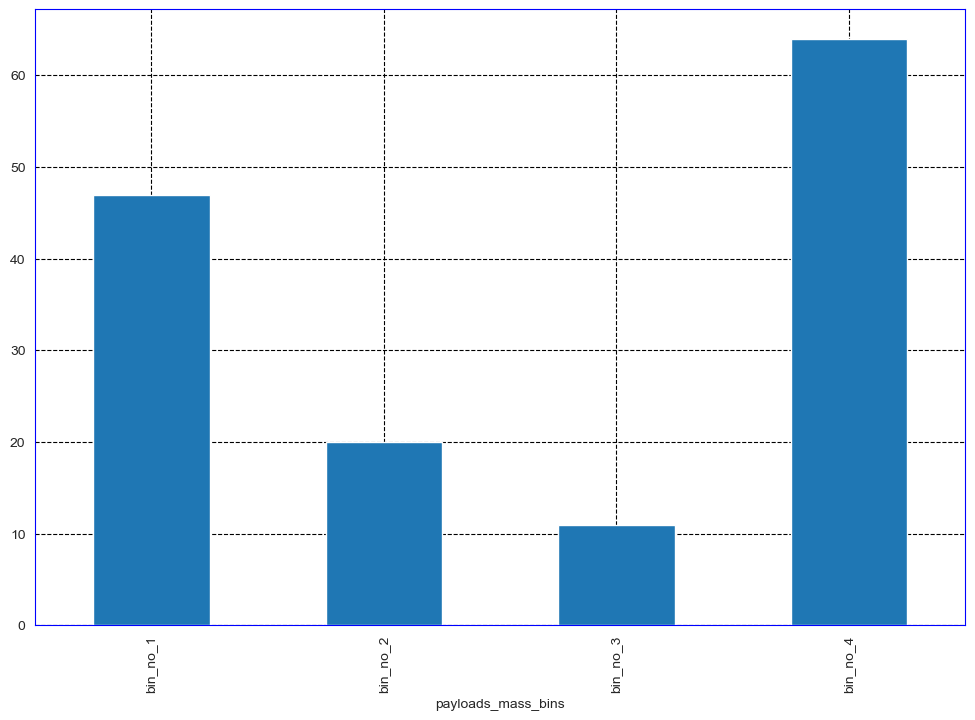

In [217]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

**Bonus points** Study about K-Means Discretization, and Decision Tree Discretization.

YOUR ANSWER HERE (Optional)

In [218]:
# YOUR CODE HERE (Optional)
# raise NotImplementedError()

In [219]:
# Exclude "bins" for next section
raw_df = raw_df.drop(["payloads_mass_bins"], axis=1)

## Outlier handling techniques (1 pts)

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

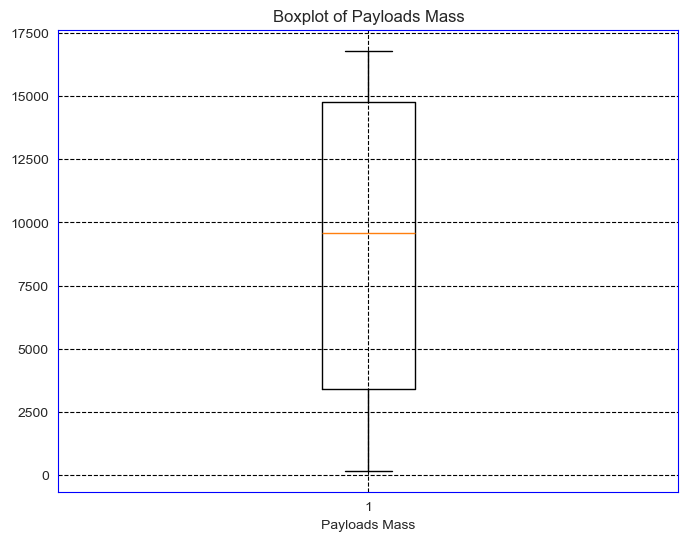

In [220]:
# YOUR CODE HERE
# Vẽ boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(raw_df['payloads_mass'], vert=True)
plt.xlabel('Payloads Mass')
plt.title('Boxplot of Payloads Mass')
plt.show()

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [221]:
IQR = raw_df["payloads_mass"].quantile(0.75) - raw_df["payloads_mass"].quantile(0.25)

lower_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.25) - (IQR * 1.5)
upper_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.75) + (IQR * 1.5)

print(f"The lower bound for payloads limitation: {lower_payloads_mass_limit}")
print(f"The upper bound for payloads limitation: {upper_payloads_mass_limit}")

The lower bound for payloads limitation: -13635.625
The upper bound for payloads limitation: 31797.375


- Step 03: Construct rule for trimming outliers.

In [222]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_payloads_mass_limit,
    True,
    np.where(raw_df["payloads_mass"] < lower_payloads_mass_limit, True, False),
)

- Step 04: Trimming outliers

In [223]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 185), (142,))

TODO: What are the advantages and disadvantages of outlier trimming?

YOUR ANSWER HERE
- Advantages:
    - Simple to Implement
    - Better Model Performance: Outliers can distort statistical analyses and machine learning models. Removing them can lead to more accurate and reliable results.
    - Reduced Variance: Outlier trimming can help in reducing the variance of the dataset.
    - Normalization of Data: Outlier trimming can contribute to normalizing the distribution of data.

- Disadvantages:
    - Loss of Information: Removing outliers may lead to a loss of valuable information, especially if the outliers represent genuine variations in the data or unique characteristics of the samples.
    - Biased Results: Outlier trimming can introduce bias into the dataset.
    - Overfitting.

### Outlier Capping Using IQR

I am very smart to use IQR to demonstrate the above technique, and for this section, I don't have to demonstrate it again. :)

TODO: Tell me, what is the IQR distance normally used to cap outliers via IQR?

YOUR ANSWER HERE
- The IQR (Interquartile Range) distance typically used to cap outliers via IQR is 1.5 times the IQR. This means that values below Q1 - 1.5 * IQR and above Q3 + 1.5 * IQR are considered outliers and capped accordingly.

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [224]:
# YOUR CODE HERE
# raise NotImplementedError()
mean = raw_df['payloads_mass'].mean()
sigma = raw_df['payloads_mass'].std()
upper_bound = mean + 3 * sigma
lower_bound = mean - 3 * sigma

- Step 02: Construct rule for trimming outliers.

In [225]:
# YOUR CODE HERE
# raise NotImplementedError()
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [226]:
# YOUR CODE HERE
# raise NotImplementedError()
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 185), (142,))

TODO: What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

YOUR ANSWER HERE
- Advantages:
    - Simple to Implement.
    - Applicability to Normally Distributed Data: Mean and standard deviation are effective for detecting outliers in datasets that follow a normal distribution.

- Disadvantages:
    - Affected by Outliers: Mean and standard deviation are highly influenced by outliers, which can skew the results and misrepresent the true central tendency and spread of the data.

### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [227]:
# YOUR CODE HERE
# raise NotImplementedError()

upper_bound = raw_df["payloads_mass"].quantile(0.9)
lower_bound = raw_df["payloads_mass"].quantile(0.1)

- Step 02: Construct rule for trimming outliers.

In [228]:
# YOUR CODE HERE
# raise NotImplementedError()
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [229]:
# YOUR CODE HERE
# raise NotImplementedError()
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 185), (142,))

TODO: What are the advantages and disadvantages of using Quantiles?

YOUR ANSWER HERE
- Advantages:
    - Less affected by outliers
- Disadvantages:
    - Loss of Information: Removing outliers may lead to a loss of valuable information, especially if the outliers represent genuine variations in the data or unique characteristics of the samples.
    - Reduce sample size: Capping outliers based on quantiles may reduce the effective sample size, potentially affecting the statistical power of subsequent analyses.

## Feature scaling techniques (2 pts)

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [230]:
scaler = StandardScaler()

- Step 02: Fitting

In [231]:
scaler.fit(raw_df.drop(["uct_time"], axis=1))

StandardScaler()

- Step 03: Transform data

In [232]:
raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

- Step 04: Test

In [233]:
raw_df_scaled.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_name_Transp

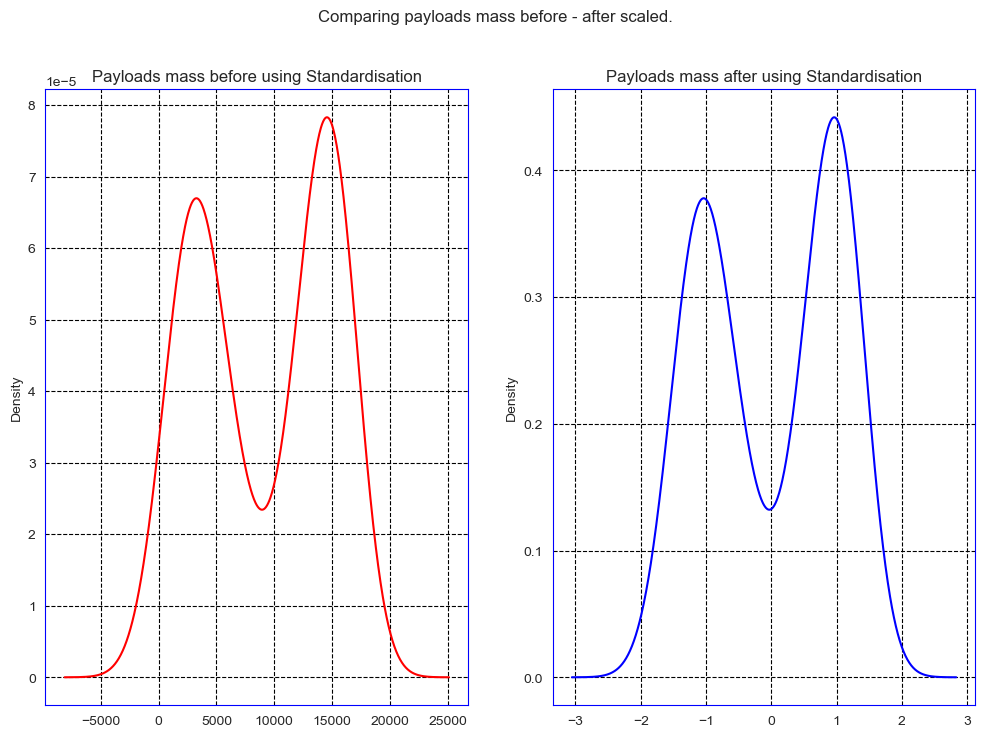

In [234]:
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE
- The values of Payloads mass are distributed predominantly at two separate peaks.
- Payloads mass after using Standardization, the shape of the graph remains unchanged.
- After using Standardization, The values of Payloads mass range from -3 to 3

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

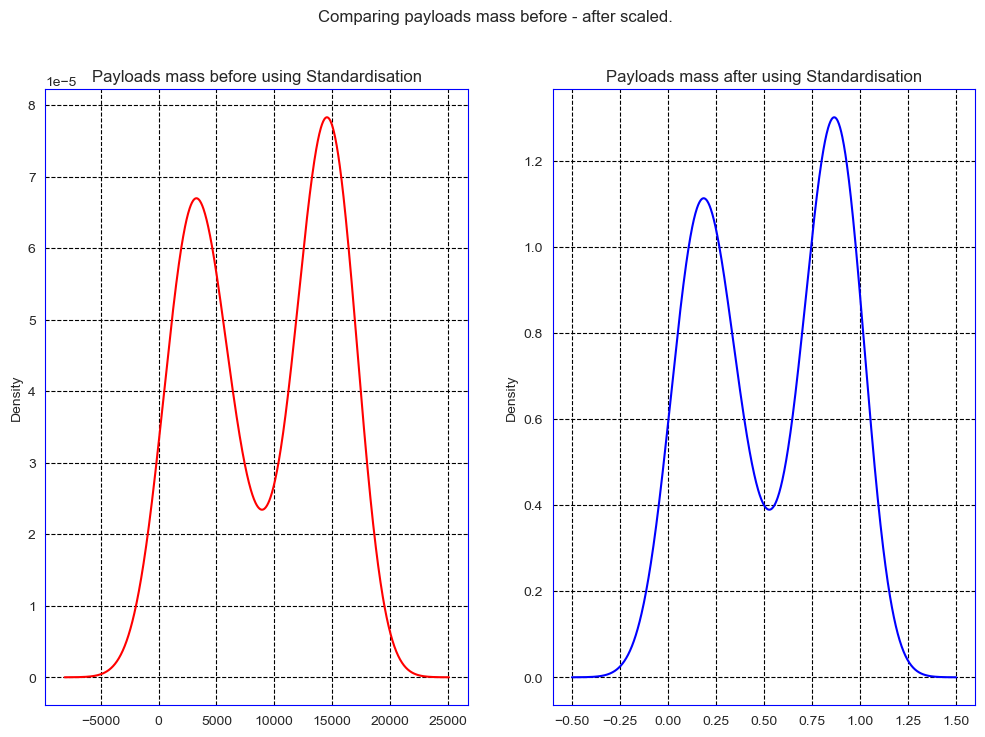

In [235]:
# YOUR CODE HERE
# raise NotImplementedError()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(raw_df.drop(["uct_time"], axis=1))

raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

#======================================================================================================

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE
- Payloads mass after using Standardization, the shape of the graph remains unchanged.
- After using Standardization, The values of Payloads mass range from -0.5 to 1.5

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**TODO: Tell me what is the difference between mean normalization and min/ max scaling.**

*Give your obervation here*

TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

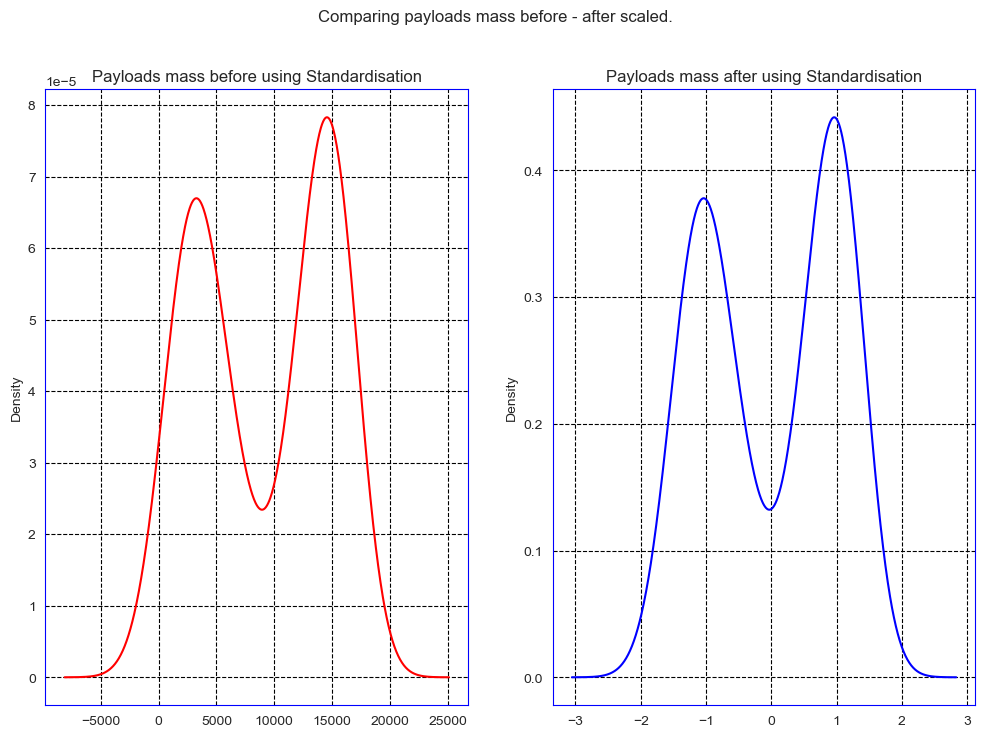

In [236]:
# YOUR CODE HERE
# raise NotImplementedError()

# Initialize the Normalizer
scaler = StandardScaler()

scaler.fit(raw_df.drop(["uct_time"], axis=1))

raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

#======================================================================================================

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE
- Payloads mass after using Standardization, the shape of the graph remains unchanged.
- After using Standardization, The values of Payloads mass range from -3 to 3

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

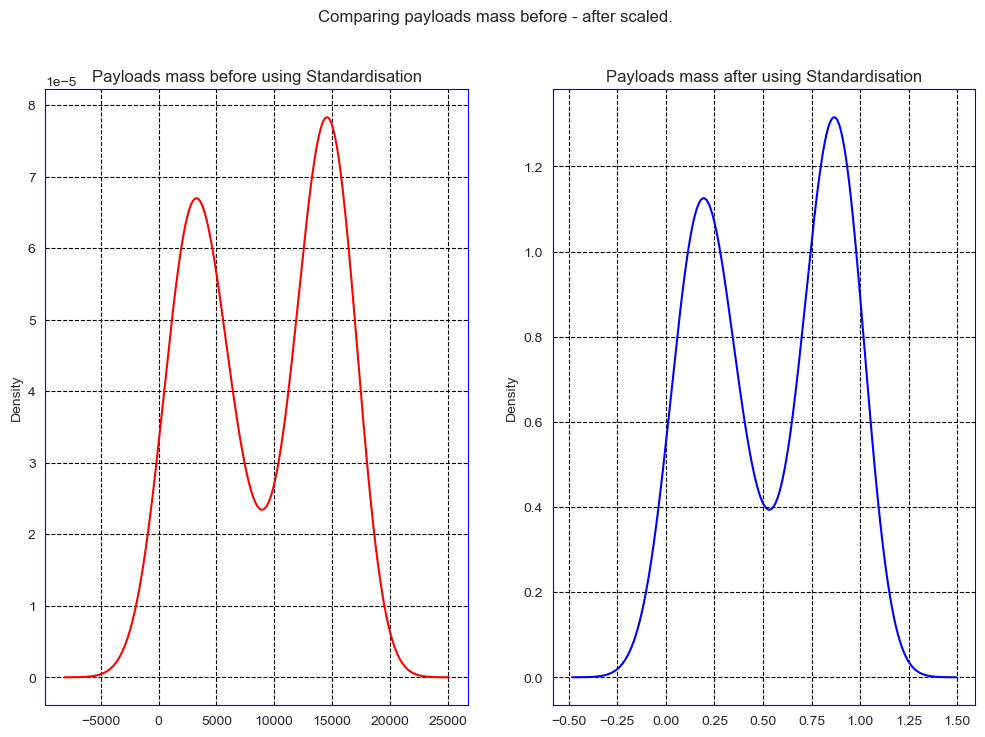

In [237]:
# YOUR CODE HERE
# raise NotImplementedError()

# Initialize the MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(raw_df.drop(["uct_time"], axis=1))

raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

#======================================================================================================

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE
- Payloads mass after using Standardization, the shape of the graph remains unchanged.
- After using Standardization, The values of Payloads mass range from -0.5 to 1.5

### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

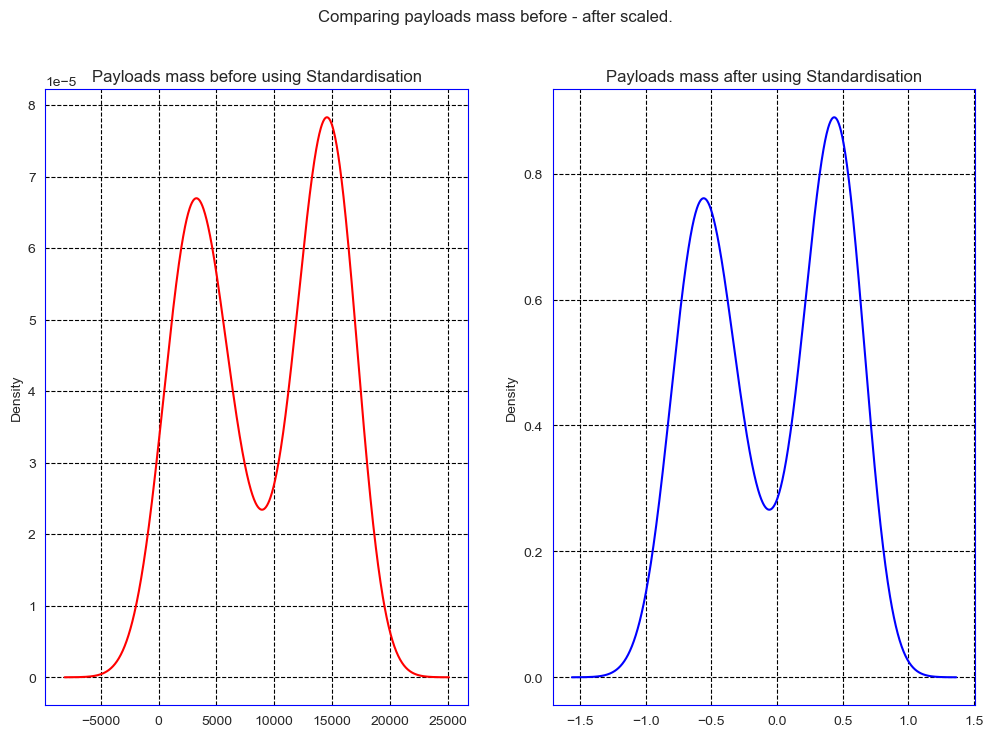

In [238]:
# YOUR CODE HERE
# raise NotImplementedError()

# Initialize the RobustScaler
scaler = RobustScaler()

scaler.fit(raw_df.drop(["uct_time"], axis=1))

raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

#======================================================================================================

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()


**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE
- Payloads mass after using Standardization, the shape of the graph remains unchanged.
- After using Standardization, The values of Payloads mass range from -0.5 to 1.5

### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

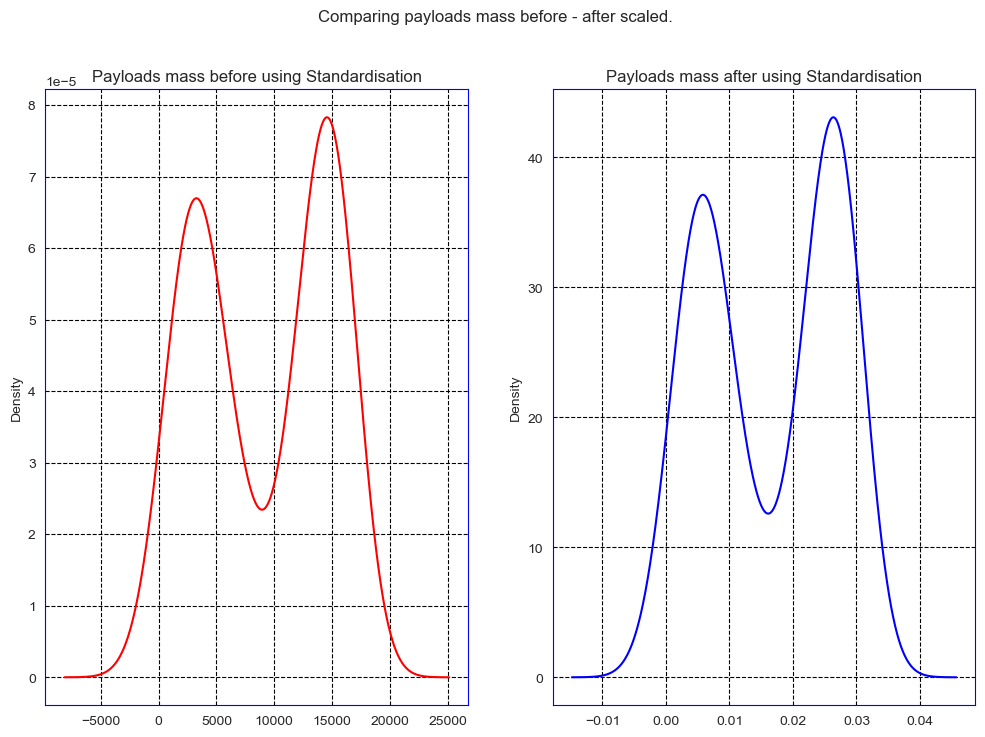

In [239]:
# YOUR CODE HERE
# raise NotImplementedError()

# Initialize the Normalizer
scaler = Normalizer(norm='l2')

scaler.fit(raw_df.drop(["uct_time"], axis=1))

raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

#======================================================================================================

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()


**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE
- Payloads mass after using Standardization, the shape of the graph remains unchanged.
- After using Standardization, The values of Payloads mass range from -0.02 to 0.05

### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

YOUR ANSWER HERE
- Feature Scaling: when the numerical features in your dataset have different scales. This is particularly important for algorithms sensitive to feature scales, such as gradient descent-based algorithms (e.g., linear regression, logistic regression, neural networks).
- Unit Length Scaling: Apply unit length scaling, also known as vector normalization, when you want to scale the vectors to have a unit norm or length. 
- Model Training: Normalize or standardize the features before training machine learning models, especially when using algorithms that are sensitive to feature scales or require convergence, such as support vector machines (SVM), k-nearest neighbors (KNN), and neural networks.

End of your lab 01.